In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/allisonhorst/palmerpenguins/main/inst/extdata/penguins.csv"
df = pd.read_csv(url)
#Removemos filas con valores nulos ya que no se pierden muchos valores
df.dropna(inplace=True)
y = df['species']
df = df.drop('species', axis=1)

display(df.head())
display(df.info())

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Torgersen,39.3,20.6,190.0,3650.0,male,2007


<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   island             333 non-null    object 
 1   bill_length_mm     333 non-null    float64
 2   bill_depth_mm      333 non-null    float64
 3   flipper_length_mm  333 non-null    float64
 4   body_mass_g        333 non-null    float64
 5   sex                333 non-null    object 
 6   year               333 non-null    int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 20.8+ KB


None

In [2]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder

#De categórico a numérico para visualización en #D
le = LabelEncoder()
y_color = le.fit_transform(y) 
scaler_pipeline = Pipeline([
    ('StandardScaler', StandardScaler())
])

preprocess = ColumnTransformer(
    transformers=[
        #Isla y sexo son categóricos por lo cual lo separamos con OHE
        ('OneHotEncoder', OneHotEncoder(handle_unknown='ignore'), ["island","sex"]),
        #Escalamiento de las variables numéricas para facilitar al algoritmo de reducción de dimensionalidad la distribución de puntops
        ('StandardScaler',scaler_pipeline,['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g','year']),
    ],
    remainder='passthrough' 
)
print(df.shape)
preprocessed_data = preprocess.fit_transform(df)



(333, 7)


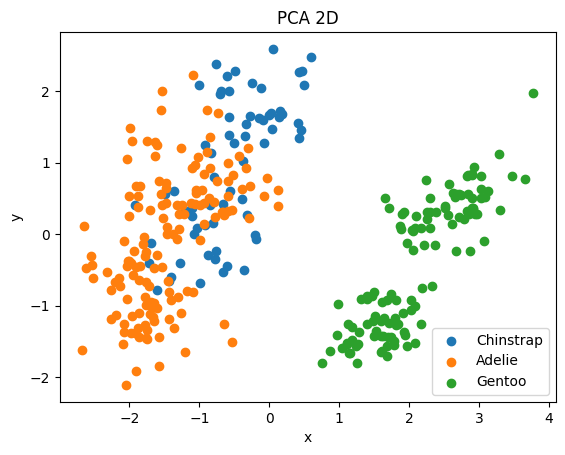

In [3]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca2d = PCA(n_components=2)
X_pca_2d = pca2d.fit_transform(preprocessed_data)


for cls in set(y):
    ix = y == cls
    plt.scatter(X_pca_2d[ix,0], X_pca_2d[ix,1], label=cls)
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("PCA 2D")
plt.show()

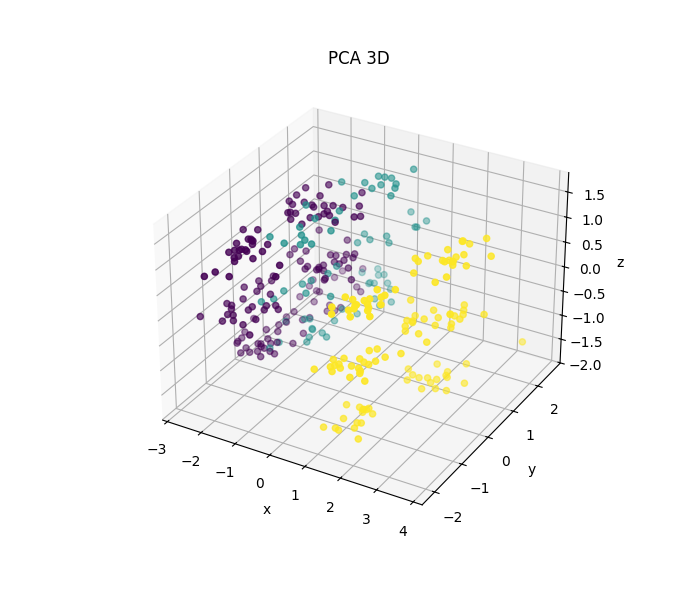

In [4]:
%matplotlib widget

pca3d = PCA(n_components=3)
X_pca3d = pca3d.fit_transform(preprocessed_data)

fig = plt.figure(figsize=(7,6))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(X_pca3d[:,0], X_pca3d[:,1], X_pca3d[:,2], c=y_color)

ax.set_title("PCA 3D")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.show()

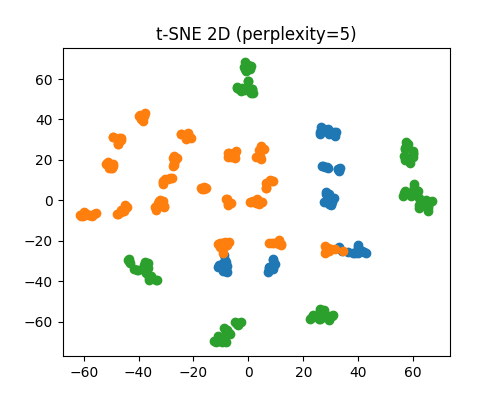

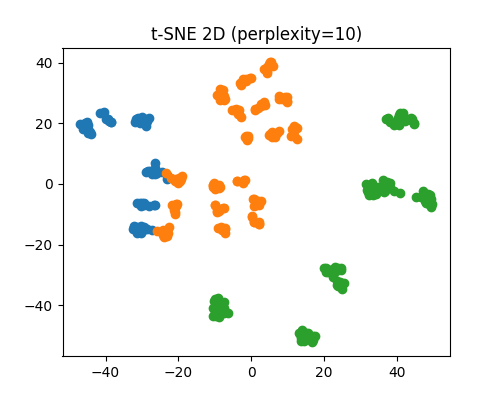

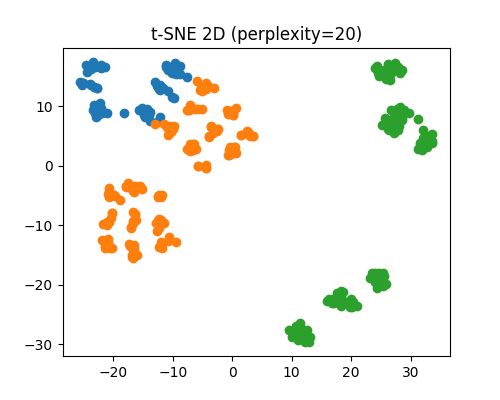

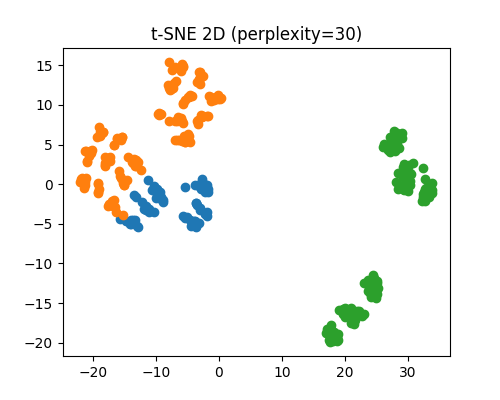

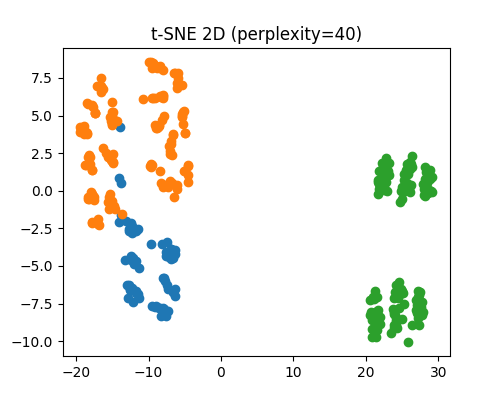

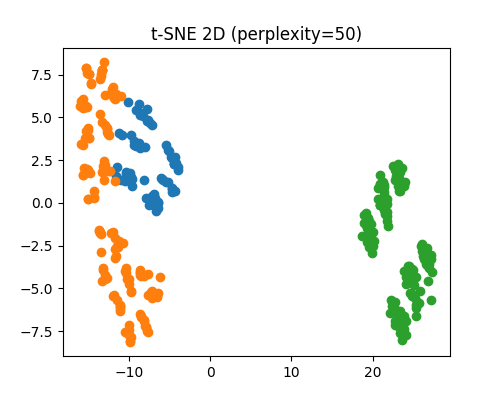

In [5]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42, perplexity=25)
X_tsne  = tsne.fit_transform(preprocessed_data)
X_tsne.shape

for p in [5, 10, 20, 30, 40, 50]:
    tsne = TSNE(n_components=2, random_state=42, perplexity=p)
    X_tsne = tsne.fit_transform(preprocessed_data)

    plt.figure(figsize=(5,4))
    for cls in set(y):
        ix = (y == cls)
        plt.scatter(X_tsne[ix,0], X_tsne[ix,1], label=str(cls))
    plt.title(f"t-SNE 2D (perplexity={p})")
    plt.show()

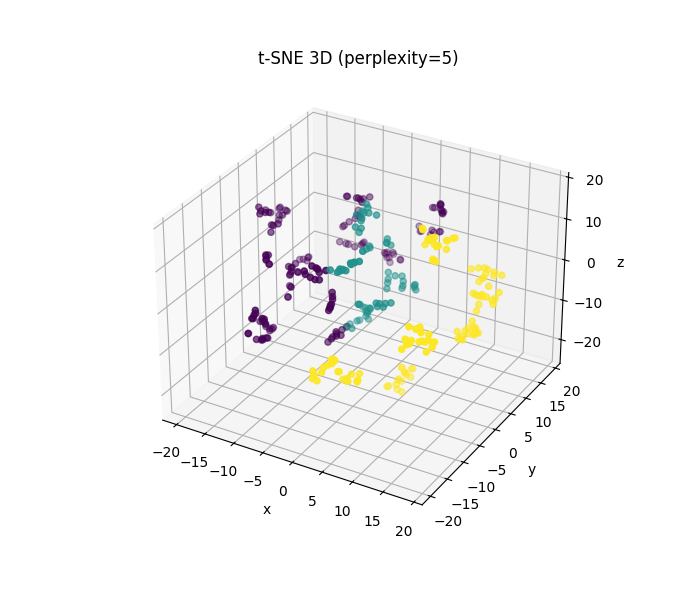

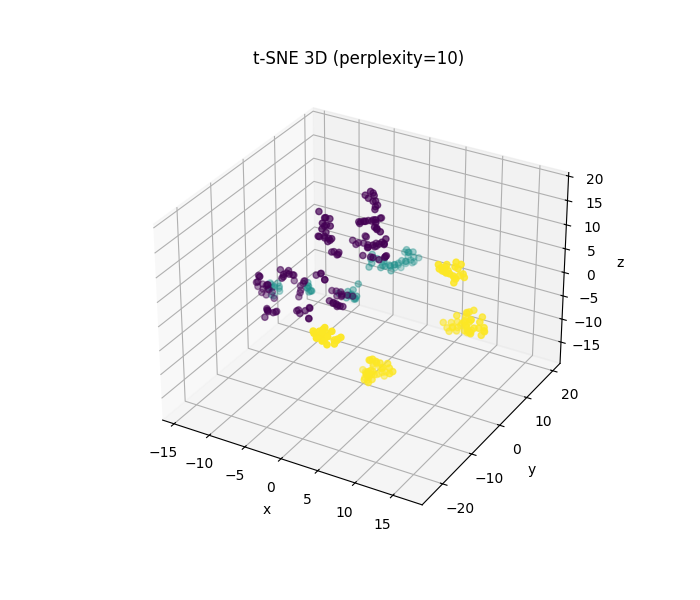

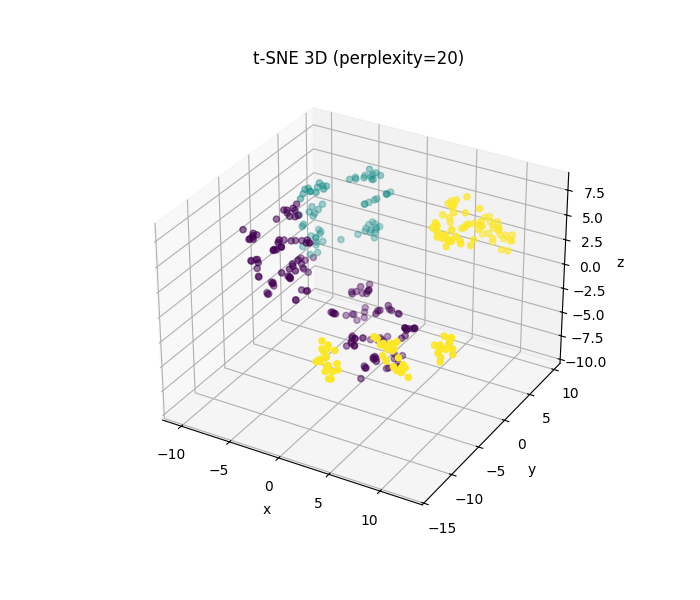

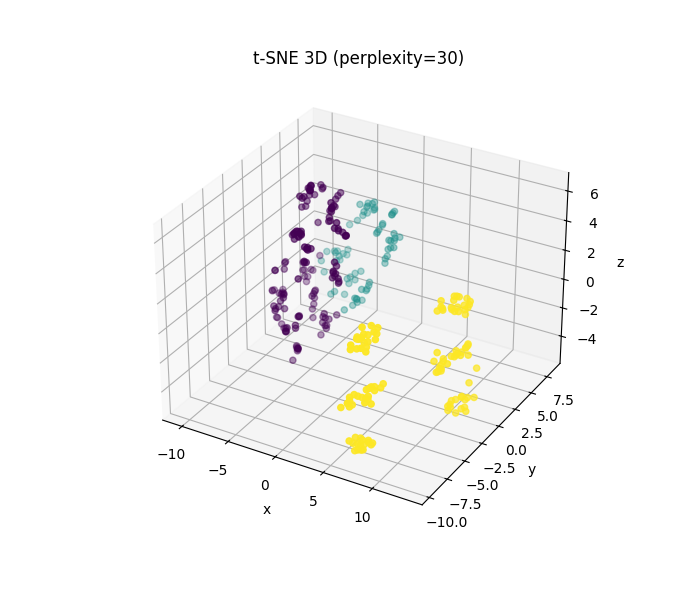

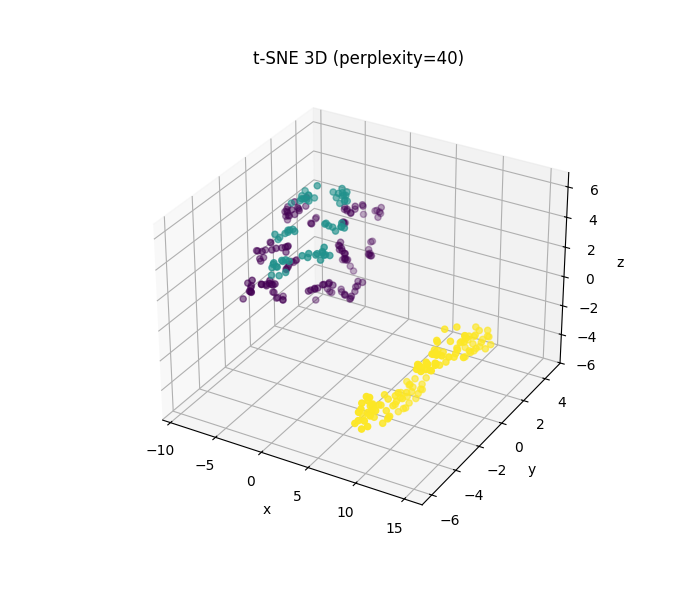

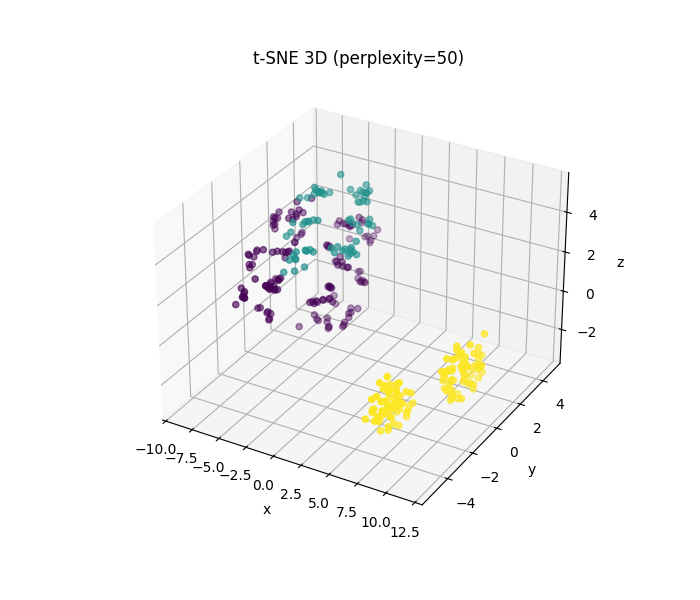

In [6]:
for p in [5, 10, 20, 30, 40,50]:


    tsne_3d = TSNE(n_components=3, perplexity=p, random_state=42)
    X_tsne_3d = tsne_3d.fit_transform(preprocessed_data)

    fig = plt.figure(figsize=(7,6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X_tsne_3d[:,0], X_tsne_3d[:,1], X_tsne_3d[:,2], c=y_color)
    ax.set_title(f"t-SNE 3D (perplexity={p})")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    plt.show()

c:\Users\mmich\anaconda3\envs\iteso-ML\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


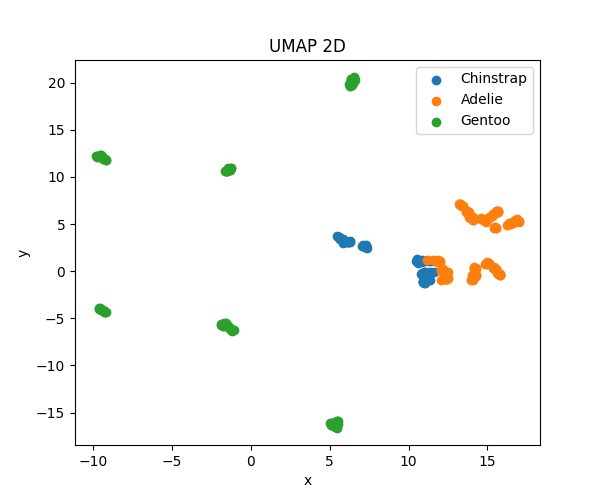

In [7]:
import umap

umap_2d = umap.UMAP(n_components=2, random_state=42)
X_umap_2d = umap_2d.fit_transform(preprocessed_data)

plt.figure(figsize=(6,5))
for cls in set(y):
    ix = y == cls
    plt.scatter(X_umap_2d[ix,0], X_umap_2d[ix,1], label=cls)
plt.legend()
plt.title("UMAP 2D")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

c:\Users\mmich\anaconda3\envs\iteso-ML\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


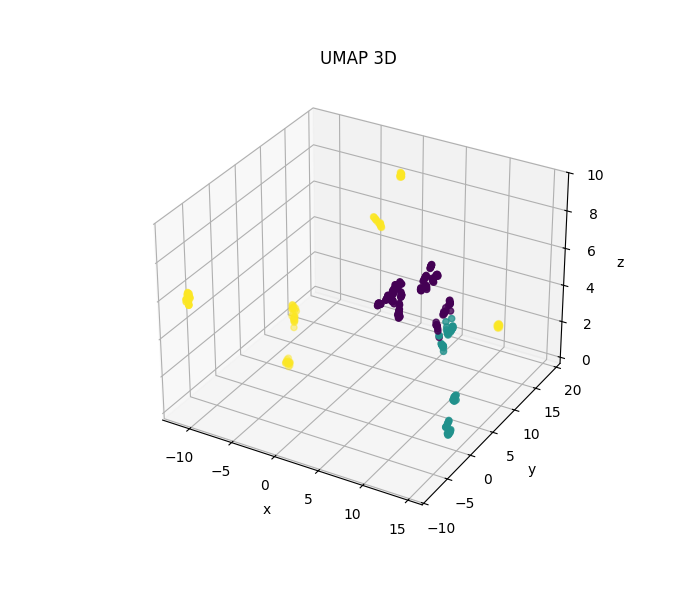

In [8]:
%matplotlib widget

umap_3d = umap.UMAP(n_components=3, random_state=42)
X_umap_3d = umap_3d.fit_transform(preprocessed_data)

fig = plt.figure(figsize=(7,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_umap_3d[:,0], X_umap_3d[:,1], X_umap_3d[:,2], c=y_color)
ax.set_title("UMAP 3D")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.show()

Como método de visualización 3D sin importar las distancias t-SNE me parece el más fácilmente comprensible visualmente gracias a que se une por medio de vecinos, pero UMAP deja mucho más claro las distinción de grupos basado con su separación, hay grupos que se encuentran mejor agrupados y de esta forma deja claro que a pesar de ser de una misma especie, no son iguales y esta distancia muestra claramente como no hay una agrupación perfecta, en comparación con PCA, vemos que claramente hay grupos que se intersectan a pesar de diferente especie y ayuda a clarificcar mejor porque distintos grupos de unen más que otros o sus mismas distancias